In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
from sklearn.model_selection import cross_val_score

In [2]:
houses = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
houses

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0


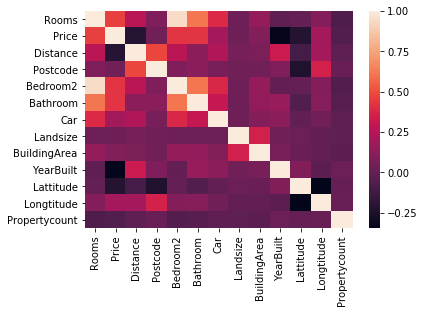

In [4]:
sns.heatmap(houses.corr())

In [5]:
houses.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235,-0.071677
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017
Distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946,-0.018140
Postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,0.089805,-0.231027,0.362895,0.017108
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164,-0.053451
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531,-0.032887
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213,-0.009617
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582,-0.018195
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143,-0.024523
YearBuilt,-0.012749,-0.333306,0.323059,0.089805,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175,0.022420


In [6]:
df = houses[['Price', 'Rooms', 'Lattitude', 'Distance', 'Car', 'Longtitude', 'Bathroom', 'BuildingArea', 'YearBuilt', 'Landsize', 'Propertycount']]
df = df.dropna()

# Transforming features to make them more normally distributed
df['Price'] = np.log(houses.Price)
df['Rooms'] = np.sqrt(houses.Rooms)
df['Distance'] = np.sqrt(houses.Distance)
df['Car'] = np.log(houses.Car + 1)
df['BuildingArea'] = np.log(houses.BuildingArea + 1)
df['YearBuilt'] = np.sqrt(houses.YearBuilt)
df['Landsize'] = np.log(houses.Landsize + 1)
df['Propertycount'] = np.sqrt(houses.Propertycount)

In [7]:
df.corr()

,Price,Rooms,Lattitude,Distance,Car,Longtitude,Bathroom,BuildingArea,YearBuilt,Landsize,Propertycount
Price,1.000000,0.543751,-0.247959,-0.222211,0.204537,0.264117,0.461755,0.467280,-0.357847,0.360029,-0.061521
Rooms,0.543751,1.000000,0.025066,0.325379,0.412769,0.076864,0.603580,0.563550,-0.000880,0.515478,-0.084294
Lattitude,-0.247959,0.025066,1.000000,-0.030255,0.012077,-0.345797,-0.041859,-0.025837,0.099394,0.067813,0.002017
Distance,-0.222211,0.325379,-0.030255,1.000000,0.321910,0.164227,0.136803,0.177060,0.329756,0.364956,-0.042645
Car,0.204537,0.412769,0.012077,0.321910,1.000000,0.055511,0.330712,0.296832,0.208496,0.286129,-0.032493
Longtitude,0.264117,0.076864,-0.345797,0.164227,0.055511,1.000000,0.109268,0.067294,-0.026434,0.055910,0.041542
Bathroom,0.461755,0.603580,-0.041859,0.136803,0.330712,0.109268,1.000000,0.466096,0.191018,0.240078,-0.048542
BuildingArea,0.467280,0.563550,-0.025837,0.177060,0.296832,0.067294,0.466096,1.000000,0.014737,0.351238,-0.062986
YearBuilt,-0.357847,-0.000880,0.099394,0.329756,0.208496,-0.026434,0.191018,0.014737,1.000000,-0.095952,0.004911
Landsize,0.360029,0.515478,0.067813,0.364956,0.286129,0.055910,0.240078,0.351238,-0.095952,1.000000,-0.086467


In [8]:
# Start with Linear Regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = df.drop(['Price'], axis=1)
y = df.Price
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print(regr.score(X, y))

0.7114407308613099


In [10]:
cross_val_score(regr, X, y, cv=10)

array([0.70905716, 0.74641428, 0.74416733, 0.7085477 , 0.69183202,
       0.66982207, 0.65883761, 0.59301088, 0.66691329, 0.70426386])

In [11]:
# Trying KNN Regression
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=3)

knn.fit(X, y)

print(knn.score(X, y))

cross_val_score(knn, X, y, cv=10)

0.8969057950149009


array([0.71200856, 0.71594992, 0.6827352 , 0.63538887, 0.67566545,
       0.74546602, 0.7334881 , 0.71346361, 0.77561959, 0.80913128])

In [12]:
from sklearn import ensemble
rfc = ensemble.RandomForestRegressor(n_estimators=100, max_depth=4)
rfc.fit(X, y)

print(rfc.score(X, y))

cross_val_score(rfc, X, y, cv=10)

0.7040220643886086


array([0.70663048, 0.69648189, 0.67691568, 0.66560617, 0.6970701 ,
       0.67968895, 0.63341179, 0.62823231, 0.70453777, 0.69934675])

Feature ranking:
1. (0.461873)  Rooms
2. (0.174385)  Lattitude
3. (0.153423)  Distance
4. (0.098272)  Car
5. (0.077736)  Longtitude
6. (0.028392)  Bathroom
7. (0.003616)  BuildingArea
8. (0.002219)  YearBuilt
9. (0.000085)  Landsize
10. (0.000000)  Propertycount


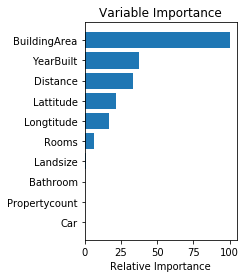

In [13]:
importances = rfc.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. (%f)  %s" % (f + 1, importances[indices[f]], X.columns[f]))

feature_importance = rfc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### According to the random forest model, the most important features are as following:
1. Building Area
2. Year Built
3. Distance from City Center
4. Lattitude
5. Longitude
6. Number of Rooms
7. Land size

In [14]:
# Support Vector Machine
from sklearn.svm import SVR
svr = SVR(C=1.0, epsilon=0.1)

svr.fit(X, y)

print(svr.score(X, y))

cross_val_score(svr, X, y, cv=10)

0.8732370519412075


array([0.81564265, 0.78724689, 0.79491523, 0.7547345 , 0.76390516,
       0.81928151, 0.80662148, 0.79288947, 0.82648892, 0.84470123])

In [15]:
# Adjusting settings to improve accuracy
from sklearn.svm import SVR
svr = SVR(C=4.0, epsilon=0.05)

svr.fit(X, y)

print(svr.score(X, y))

cross_val_score(svr, X, y, cv=10)

0.907276572807269


array([0.83395883, 0.80087443, 0.80310654, 0.77555371, 0.76986701,
       0.8411464 , 0.8204545 , 0.80812187, 0.85656558, 0.86704436])

### The SVR model proved to be the most accurate.